In [42]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import cartopy.crs as ccrs
import cartopy
from matplotlib.animation import FuncAnimation

In [12]:
savepath='/gxfs_home/geomar/smomw577/plots/Boxcar/animation/Agulhas/'
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181/'

In [13]:
dsa=xr.open_dataset(pathf+'3x3_boxfilter_anomaly_daily.nc', chunks='auto')

In [55]:
def animate(i):
    #axs.clear()
    plot=dsa.o2_stf.isel(time=i).plot(ax=axs, vmin=-10, vmax=10, cmap=cmo.balance, transform = ccrs.PlateCarree())

MovieWriter imagemagick unavailable; using Pillow instead.


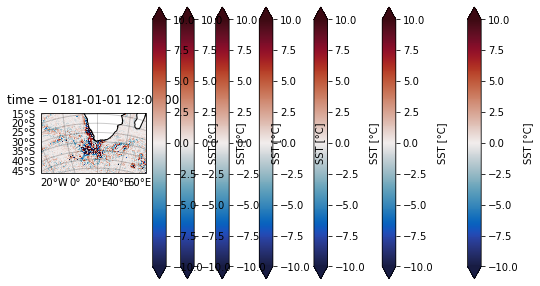

In [59]:
fig, axs= plt.subplots(nrows=1, ncols=1 , figsize=(9,5),subplot_kw={'projection': ccrs.NearsidePerspective(central_longitude=20, central_latitude=-30, satellite_height=25785831)})
axs.set_extent([-15, 50, -50, -15])
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1, color='black', alpha=0.2)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
axs.coastlines()
axs.set_title('SST', fontweight='bold');    

animation = FuncAnimation(fig, animate, 5, interval=365, blit=False)
animation.save(filename=savepath+'Agulhas_SST.gif', writer="imagemagick")


In [ ]:
#no cbar, find way to save gif

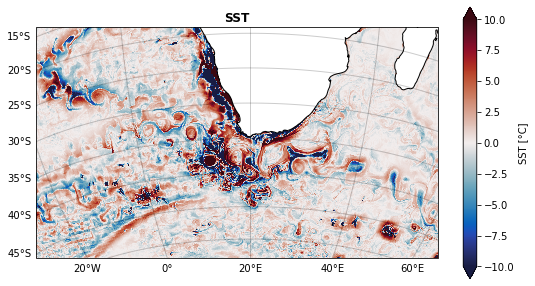

In [41]:
fig, axs= plt.subplots(nrows=1, ncols=1 , figsize=(9,5),subplot_kw={'projection': ccrs.NearsidePerspective(central_longitude=20, central_latitude=-30, satellite_height=25785831)})
axs.set_extent([-15, 50, -50, -15])

dsa.o2_stf.isel(time=20).plot(ax=axs, vmin=-10, vmax=10, cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SST [°C]"})
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.2)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
axs.coastlines()
axs.set_title('SST', fontweight='bold');